In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart_attack_possibility.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.target.value_counts()    #balnced ==> y data

1    165
0    138
Name: target, dtype: int64

In [5]:
df.target.isna().sum()

0

In [6]:
df.age.unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [7]:
df.age.isna().sum()

0

In [8]:
X = df[['age']]
y = df.target

In [9]:
X

,age
0,63
1,37
2,41
3,56
4,57
...,...
298,57
299,45
300,68
301,57


In [10]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [11]:
#split the dataset

from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

In [13]:
# import Logistic class

from sklearn.linear_model import LogisticRegression

In [14]:
#Object Creation
model = LogisticRegression()

In [15]:
model

LogisticRegression()

In [16]:
#training of data

model.fit(X_train,y_train)

LogisticRegression()

In [17]:
# validation/prediction test data--> X_test

y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [18]:
X_test

,age
186,60
259,38
247,66
298,57
150,66
...,...
198,62
2,41
39,65
184,50


In [19]:
y_test

186    0
259    0
247    0
298    0
150    1
      ..
198    0
2      1
39     1
184    0
274    0
Name: target, Length: 61, dtype: int64

In [20]:
# check training accuracy

model.score(X_train,y_train) * 100

60.74380165289256

In [21]:
#test data accuracy

model.score(X_test,y_test)*100

67.21311475409836

In [22]:
# Actual vs predicted performance
# Lets try to apply Performance measures

from sklearn.metrics import log_loss

In [23]:
log_loss(y_test,y_pred)

11.32430695532927

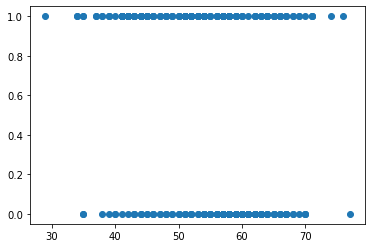

In [24]:
plt.scatter(df[['age']],df.target)